<a href="https://colab.research.google.com/github/VivekRkay/Fastai-Projects/blob/master/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
img_size = 24

In [6]:
path = untar_data(URLs.CIFAR); path

PosixPath('/root/.fastai/data/cifar10')

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt')]

In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, ds_tfms = tfms, valid = 'test', size = img_size, bs = bs).normalize(imagenet_stats)

In [9]:
print(data.classes)
len(data.classes), data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

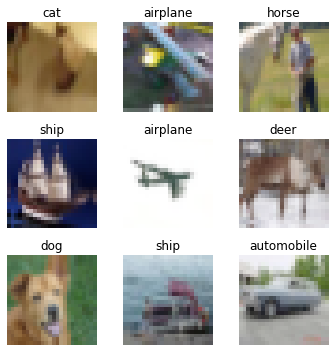

In [10]:
data.show_batch(rows=3, figsize=(5,5))

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [12]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [13]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.006902,1.671505,0.439300,01:31
1,1.570632,1.377125,0.514800,01:29
2,1.360141,1.200269,0.582600,01:30
3,1.194316,1.035981,0.632300,01:30
4,1.076566,0.963100,0.664400,01:29
5,1.010241,0.887173,0.682500,01:29
6,0.953591,0.856156,0.695200,01:28
7,0.894987,0.826289,0.709900,01:29
8,0.905865,0.817248,0.712400,01:29
9,0.895486,0.816291,0.713000,01:29


In [14]:
interp = ClassificationInterpretation.from_learner(learn)

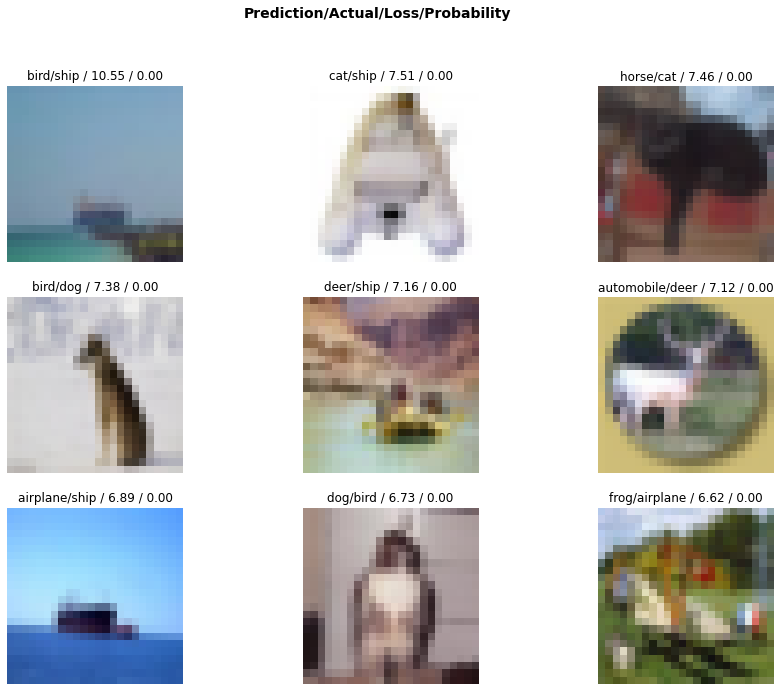

In [15]:
interp.plot_top_losses(9, figsize = (15, 11))

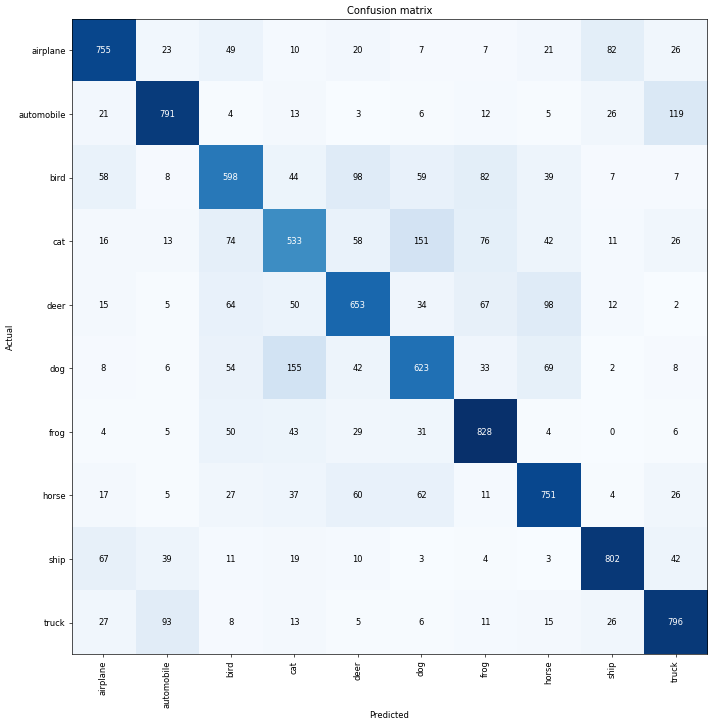

In [16]:
interp.plot_confusion_matrix(figsize = (12, 12), dpi = 60)

In [17]:
interp.most_confused(min_val = 2)

[('dog', 'cat', 155),
 ('cat', 'dog', 151),
 ('automobile', 'truck', 119),
 ('bird', 'deer', 98),
 ('deer', 'horse', 98),
 ('truck', 'automobile', 93),
 ('airplane', 'ship', 82),
 ('bird', 'frog', 82),
 ('cat', 'frog', 76),
 ('cat', 'bird', 74),
 ('dog', 'horse', 69),
 ('deer', 'frog', 67),
 ('ship', 'airplane', 67),
 ('deer', 'bird', 64),
 ('horse', 'dog', 62),
 ('horse', 'deer', 60),
 ('bird', 'dog', 59),
 ('bird', 'airplane', 58),
 ('cat', 'deer', 58),
 ('dog', 'bird', 54),
 ('deer', 'cat', 50),
 ('frog', 'bird', 50),
 ('airplane', 'bird', 49),
 ('bird', 'cat', 44),
 ('frog', 'cat', 43),
 ('cat', 'horse', 42),
 ('dog', 'deer', 42),
 ('ship', 'truck', 42),
 ('bird', 'horse', 39),
 ('ship', 'automobile', 39),
 ('horse', 'cat', 37),
 ('deer', 'dog', 34),
 ('dog', 'frog', 33),
 ('frog', 'dog', 31),
 ('frog', 'deer', 29),
 ('horse', 'bird', 27),
 ('truck', 'airplane', 27),
 ('airplane', 'truck', 26),
 ('automobile', 'ship', 26),
 ('cat', 'truck', 26),
 ('horse', 'truck', 26),
 ('truck', 

In [0]:
learn.save('stage-1')

In [19]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


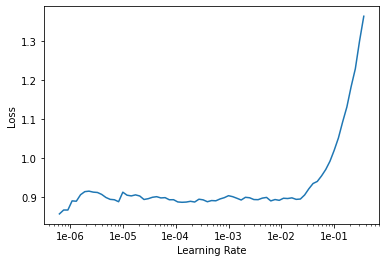

In [20]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.753928,0.632796,0.777900,01:34


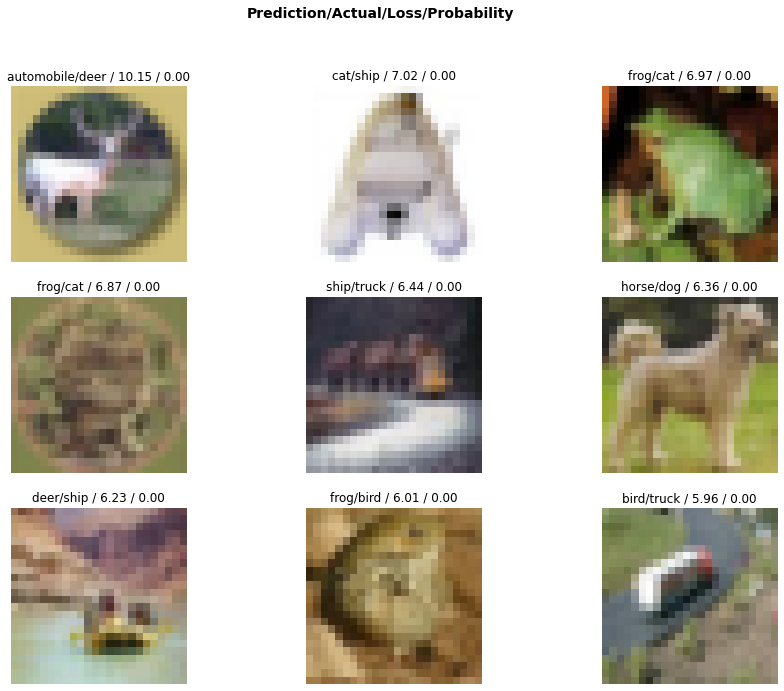

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize = (15, 11))

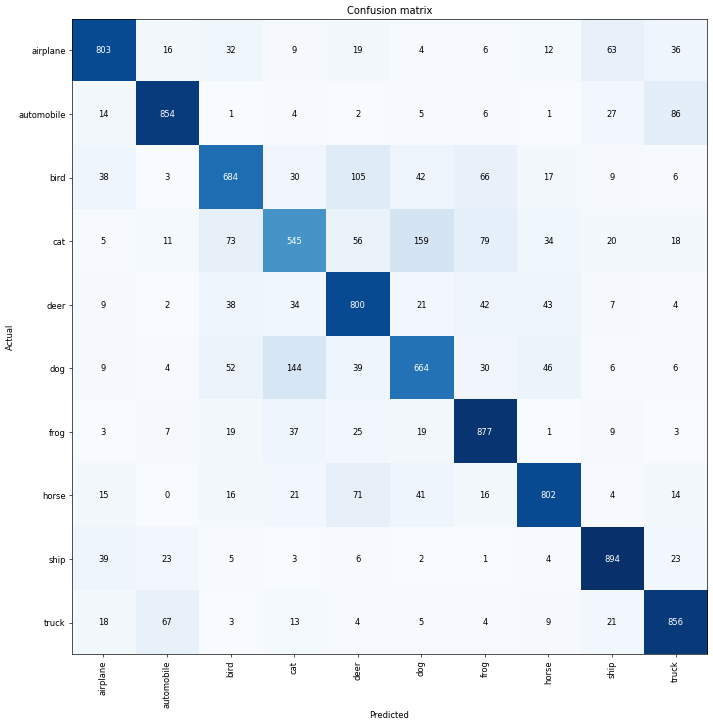

In [25]:
interp.plot_confusion_matrix(figsize = (12, 12), dpi = 60)

In [26]:
interp.most_confused(min_val = 2)

[('cat', 'dog', 159),
 ('dog', 'cat', 144),
 ('bird', 'deer', 105),
 ('automobile', 'truck', 86),
 ('cat', 'frog', 79),
 ('cat', 'bird', 73),
 ('horse', 'deer', 71),
 ('truck', 'automobile', 67),
 ('bird', 'frog', 66),
 ('airplane', 'ship', 63),
 ('cat', 'deer', 56),
 ('dog', 'bird', 52),
 ('dog', 'horse', 46),
 ('deer', 'horse', 43),
 ('bird', 'dog', 42),
 ('deer', 'frog', 42),
 ('horse', 'dog', 41),
 ('dog', 'deer', 39),
 ('ship', 'airplane', 39),
 ('bird', 'airplane', 38),
 ('deer', 'bird', 38),
 ('frog', 'cat', 37),
 ('airplane', 'truck', 36),
 ('cat', 'horse', 34),
 ('deer', 'cat', 34),
 ('airplane', 'bird', 32),
 ('bird', 'cat', 30),
 ('dog', 'frog', 30),
 ('automobile', 'ship', 27),
 ('frog', 'deer', 25),
 ('ship', 'automobile', 23),
 ('ship', 'truck', 23),
 ('deer', 'dog', 21),
 ('horse', 'cat', 21),
 ('truck', 'ship', 21),
 ('cat', 'ship', 20),
 ('airplane', 'deer', 19),
 ('frog', 'bird', 19),
 ('frog', 'dog', 19),
 ('cat', 'truck', 18),
 ('truck', 'airplane', 18),
 ('bird', '

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


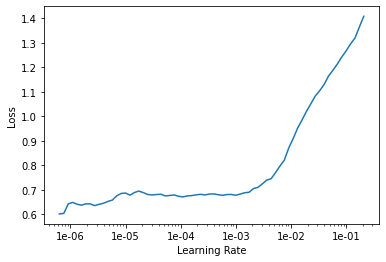

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(5, max_lr = slice(None, 1e-03, None))

epoch,train_loss,valid_loss,accuracy,time
0,0.653147,0.603819,0.786400,01:31
1,0.638287,0.589095,0.794800,01:34
2,0.526019,0.521782,0.822400,01:34
3,0.436299,0.490341,0.830800,01:34
4,0.393054,0.487110,0.832100,01:34


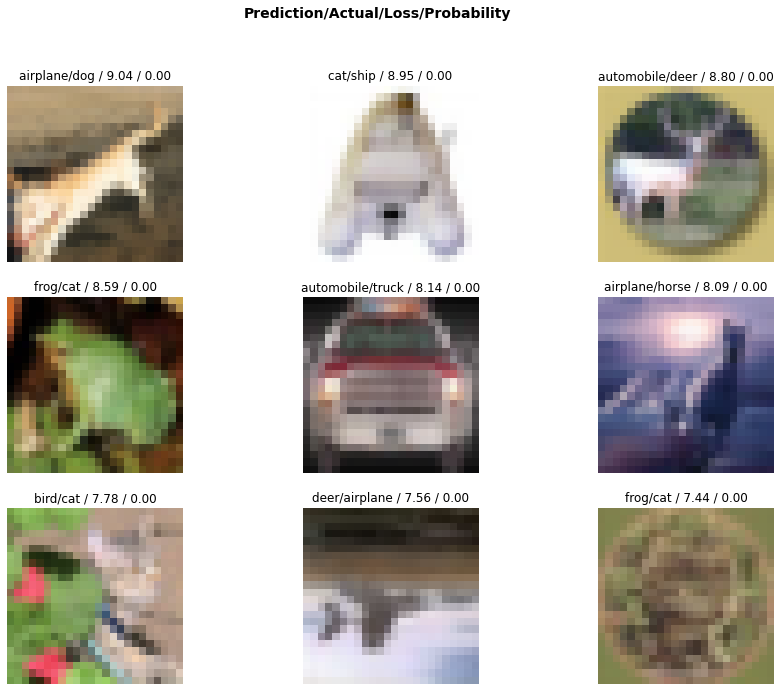

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize = (15, 11))

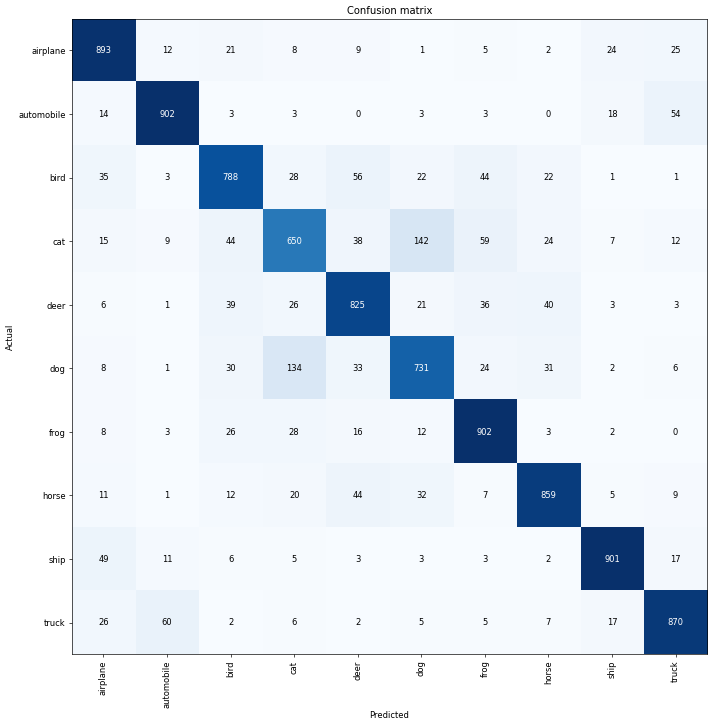

In [31]:
interp.plot_confusion_matrix(figsize = (12, 12), dpi = 60)

In [32]:
interp.most_confused(min_val = 2)

[('cat', 'dog', 142),
 ('dog', 'cat', 134),
 ('truck', 'automobile', 60),
 ('cat', 'frog', 59),
 ('bird', 'deer', 56),
 ('automobile', 'truck', 54),
 ('ship', 'airplane', 49),
 ('bird', 'frog', 44),
 ('cat', 'bird', 44),
 ('horse', 'deer', 44),
 ('deer', 'horse', 40),
 ('deer', 'bird', 39),
 ('cat', 'deer', 38),
 ('deer', 'frog', 36),
 ('bird', 'airplane', 35),
 ('dog', 'deer', 33),
 ('horse', 'dog', 32),
 ('dog', 'horse', 31),
 ('dog', 'bird', 30),
 ('bird', 'cat', 28),
 ('frog', 'cat', 28),
 ('deer', 'cat', 26),
 ('frog', 'bird', 26),
 ('truck', 'airplane', 26),
 ('airplane', 'truck', 25),
 ('airplane', 'ship', 24),
 ('cat', 'horse', 24),
 ('dog', 'frog', 24),
 ('bird', 'dog', 22),
 ('bird', 'horse', 22),
 ('airplane', 'bird', 21),
 ('deer', 'dog', 21),
 ('horse', 'cat', 20),
 ('automobile', 'ship', 18),
 ('ship', 'truck', 17),
 ('truck', 'ship', 17),
 ('frog', 'deer', 16),
 ('cat', 'airplane', 15),
 ('automobile', 'airplane', 14),
 ('airplane', 'automobile', 12),
 ('cat', 'truck', 1

In [33]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


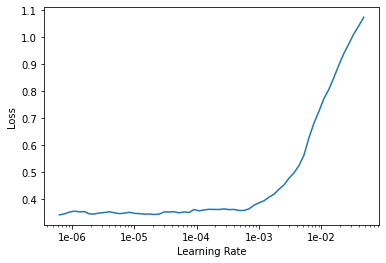

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(10, max_lr = slice(None, 1e-04, None))

epoch,train_loss,valid_loss,accuracy,time
0,0.390474,0.487788,0.833700,01:34
1,0.381027,0.485284,0.833200,01:34
2,0.383262,0.484937,0.836200,01:35
3,0.358245,0.484395,0.837700,01:34
4,0.354556,0.484552,0.835100,01:36
5,0.336115,0.484301,0.839700,01:36
6,0.325619,0.484887,0.839700,01:36
7,0.317779,0.486595,0.838700,01:36
8,0.309763,0.485017,0.837700,01:37
9,0.303089,0.483707,0.838700,01:37
